# Survival rate Montreal businesses

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay, auc, roc_auc_score
from sklearn.inspection import DecisionBoundaryDisplay
import math

## Data Import

In [2]:
df = pd.read_csv('informe_les_commercants.csv')

In [3]:
df.head(3)

,ID Réponse,Date,Phase,Type de territoire,Arrondissement / Ville liée,Statut du commerce,Enjeux: Soutien financier?,Enjeux: Maintien des opérations?,Enjeux: Fiscalité (taxes et impôts)?,Enjeux: Ressources humaines?,...,Présence sur LinkedIn?,Faites-vous de la vente en ligne?,Canal de vente en ligne,Connaissez-vous le service de livraison urbaine?,Êtes-vous intéressé par le service de livraison urbaine?,Intérêt pour le programme d'accompagnement pour le virage numérique des entreprises?,Offrez-vous un service de livraison?,Êtes-vous satisfait de votre service de livraison actuel?,Seriez-vous intéressé par le service de livraison urbain (à vélo) mise en place par la Ville de Montréal et ses partenaires si vous si aviez accès?,Est-ce que l'information que nous vous avons donnée vous a été utile?
0,1,2020-05-12,1,Arrondissement,Le Plateau-Mont-Royal,Ouvert,NaN,Oui,NaN,Oui,...,NaN,Non,Pas de vente en ligne,Sans réponse,Sans réponse,"Non, je n'ai pas d'intérêt à faire un virage n...",Question non posée lors de l'appel,Question non posée lors de l'appel,Question non posée lors de l'appel,Non
1,2,2020-05-12,1,Arrondissement,Outremont,Partiellement ouvert,Oui,NaN,NaN,NaN,...,NaN,Non,Pas de vente en ligne,Non,Oui,"Non, je n'ai pas d'intérêt à faire un virage n...",Question non posée lors de l'appel,Question non posée lors de l'appel,Question non posée lors de l'appel,Oui
2,3,2020-05-12,1,Arrondissement,Le Plateau-Mont-Royal,Ouvert,NaN,NaN,NaN,Oui,...,NaN,Oui,Site transactionnel,Oui,Non,"Non, j'ai déjà ce qu'il me faut pour faire un ...",Question non posée lors de l'appel,Question non posée lors de l'appel,Question non posée lors de l'appel,Oui


In [4]:
df.columns

Index(['ID Réponse', 'Date', 'Phase', 'Type de territoire',
       'Arrondissement / Ville liée', 'Statut du commerce',
       'Enjeux: Soutien financier?', 'Enjeux: Maintien des opérations?',
       'Enjeux: Fiscalité (taxes et impôts)?', 'Enjeux: Ressources humaines?',
       'Enjeux: Réglementation?', 'Enjeux: Marketing?',
       'Enjeux: Santé et sécurité?',
       'Enjeux: Recherche d'équipement sanitaire?',
       'Enjeux: Aménagement de l'espace?',
       'Enjeux: Permis pour les terrasses extérieures?', 'Enjeux: Autre?',
       'Intérêt pour le programme d'aide d'urgence?',
       'Présence sur les médias sociaux?', 'Présence sur Facebook?',
       'Présence sur Twitter?', 'Présence sur Instagram?',
       'Présence sur LinkedIn?', 'Faites-vous de la vente en ligne?',
       'Canal de vente en ligne',
       'Connaissez-vous le service de livraison urbaine?',
       'Êtes-vous intéressé par le service de livraison urbaine?',
       'Intérêt pour le programme d'accompagnement po

## Data Cleaning

### Rename columns & variables selection

In [5]:
# Rename columns
rename = {"Arrondissement / Ville liée": "Location", "Statut du commerce": "Operation_status", 
         "Enjeux: Soutien financier?": "Challenge_financial_support", 
         "Enjeux: Maintien des opérations?": "Challenge_maintain_ops", 
         "Enjeux: Fiscalité (taxes et impôts)?": "Challenge_taxes", 
         "Enjeux: Ressources humaines?": "Challenge_HR", 
         "Enjeux: Réglementation?": "Challenge_regulation", 
         "Enjeux: Marketing?": "Challenge_marketing", 
         "Enjeux: Santé et sécurité?": "Challenge_security_health", 
         "Enjeux: Recherche d'équipement sanitaire?": "Challenge_sanitary_equip", 
         "Enjeux: Aménagement de l'espace?": "Challenge_space_management", 
         "Enjeux: Permis pour les terrasses extérieures?": "Challenge_terasse_permit", 
         "Enjeux: Autre?": "Other_challenges", 
         "Présence sur les médias sociaux?": "Social_media_pressence",
          "Présence sur Facebook?" : "Facebook", 
          "Présence sur Twitter?": "Twitter", 
          "Présence sur Instagram?": "Instagram", 
          "Présence sur LinkedIn?": "Linkedin", 
          "Faites-vous de la vente en ligne?": "Online_businesses", 
          "Canal de vente en ligne": "Channel_online_business", 
          "Offrez-vous un service de livraison?": "Delivery_service_offer", 
          "Êtes-vous satisfait de votre service de livraison actuel?": "Satisfaction_current_delivery_service"
         }

df = df.rename(columns = rename)

In [6]:
# Preliminary variables selection: Remove variables not relevant to the analysis
drop_columns = ['ID Réponse', 'Type de territoire', "Intérêt pour le programme d'aide d'urgence?", 
               'Connaissez-vous le service de livraison urbaine?', 'Êtes-vous intéressé par le service de livraison urbaine?',
               "Intérêt pour le programme d'accompagnement pour le virage numérique des entreprises?", 
               'Seriez-vous intéressé par le service de livraison urbain (à vélo) mise en place par la Ville de Montréal et ses partenaires si vous si aviez accès?', 
               "Est-ce que l'information que nous vous avons donnée vous a été utile?"]

In [7]:
df = df.drop(drop_columns, axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Date                                   1896 non-null   object
 1   Phase                                  1896 non-null   int64 
 2   Location                               1347 non-null   object
 3   Operation_status                       1896 non-null   object
 4   Challenge_financial_support            928 non-null    object
 5   Challenge_maintain_ops                 167 non-null    object
 6   Challenge_taxes                        89 non-null     object
 7   Challenge_HR                           149 non-null    object
 8   Challenge_regulation                   82 non-null     object
 9   Challenge_marketing                    266 non-null    object
 10  Challenge_security_health              236 non-null    object
 11  Challenge_sanitar

### Date column transformation

In [9]:
def string_to_date(row):
    row['Date'] = datetime.strptime(row['Date'], '%Y-%m-%d')
    return row

df = df.apply(string_to_date, axis=1)

### Missing data

In [10]:
for i in df.columns: 
    if df[i].count() < 1896:
        print(i)
        print(df[i].unique())

Location
['Le Plateau-Mont-Royal' 'Outremont' 'Côte-des-Neiges-Notre-Dame-de-Grâce'
 'Ahuntsic-Cartierville' 'Rosemont-La Petite-Patrie'
 'Villeray-Saint-Michel-Parc-Extension' 'Verdun' nan 'Le Sud-Ouest'
 'Westmount' 'Mont-Royal' 'Saint-Laurent' 'Montréal-Nord' 'Saint-Léonard'
 'Rivière-des-Prairies-Pointe-aux-Trembles' 'Ville-Marie'
 'Mercier-Hochelaga-Maisonneuve' 'Kirkland' 'Pierrefonds-Roxboro'
 'LaSalle' 'Dollard-des-Ormeaux' 'Anjou' 'Pointe-Claire' 'Montréal-Ouest'
 'Beaconsfield' 'Dorval' "L'Île-Bizard-Sainte-Geneviève" 'Lachine'
 'Île-Bizard-Sainte-Geneviève']
Challenge_financial_support
[nan 'Oui']
Challenge_maintain_ops
['Oui' nan]
Challenge_taxes
[nan 'Oui']
Challenge_HR
['Oui' nan]
Challenge_regulation
[nan 'Oui']
Challenge_marketing
[nan 'Oui']
Challenge_security_health
[nan 'Oui']
Challenge_sanitary_equip
[nan 'Oui']
Challenge_space_management
[nan 'Oui']
Challenge_terasse_permit
[nan 'Oui']
Other_challenges
['Oui' nan]
Facebook
[nan 'Oui']
Twitter
[nan 'Oui']
Instagram


Noted that Location has 28% missing values. In addition, the missing values in other columns marked as 'nan' are considered "No" answer as the unique values of the columns is "Oui" (Yes) and 'nan'. 

Proposed solution: 
- Location is a critical variable in the analysis. Retain the dataset with missing values, and retain the data set with missing values in the Location variable removed for analysis. 
- All other columns with 'nan' values will be regarded as 'No' in answer.

In [11]:
nan_columns=['Challenge_financial_support', 'Challenge_maintain_ops', 
                        'Challenge_taxes', 'Challenge_HR', 'Challenge_regulation', 
                        'Challenge_marketing', 'Challenge_security_health', 
                        'Challenge_sanitary_equip', 'Challenge_space_management',
                        'Challenge_terasse_permit', 'Other_challenges','Facebook', 'Twitter',
                        'Instagram', 'Linkedin']
nan_dict = {i: 'No' for i in nan_columns}
df = df.fillna(value=nan_dict)

In [12]:
# Drop Unknown status from Operation_status
df = df.drop(df[df['Operation_status'] == "Statut inconnu"].index)

In [13]:
df_with_loc = df.copy()
df_drop_loc = df.copy().drop(columns=['Location'])

## Data Exploration

<Axes: xlabel='Phase', ylabel='Count'>

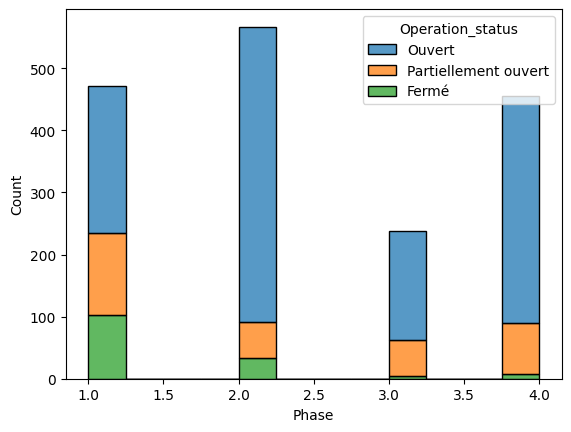

In [14]:
sns.histplot(df_with_loc, x='Phase', hue='Operation_status', multiple='stack')

<Axes: xlabel='Date'>

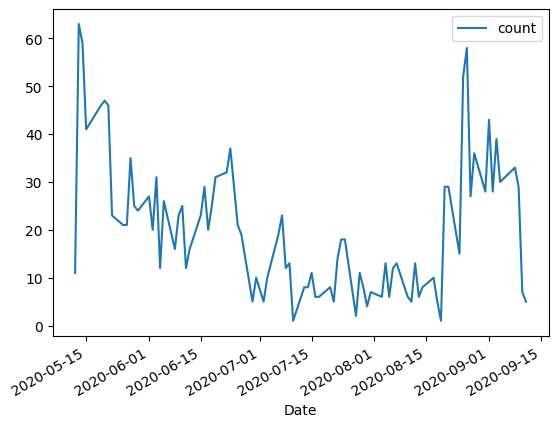

In [15]:
# Understanding the data collection frequency
date_count = pd.DataFrame(df_with_loc.value_counts('Date')).reset_index()
date_count.sort_values('Date').reset_index(drop=True)
date_count.plot(x='Date', y='count')

<Axes: xlabel='Date', ylabel='Count'>

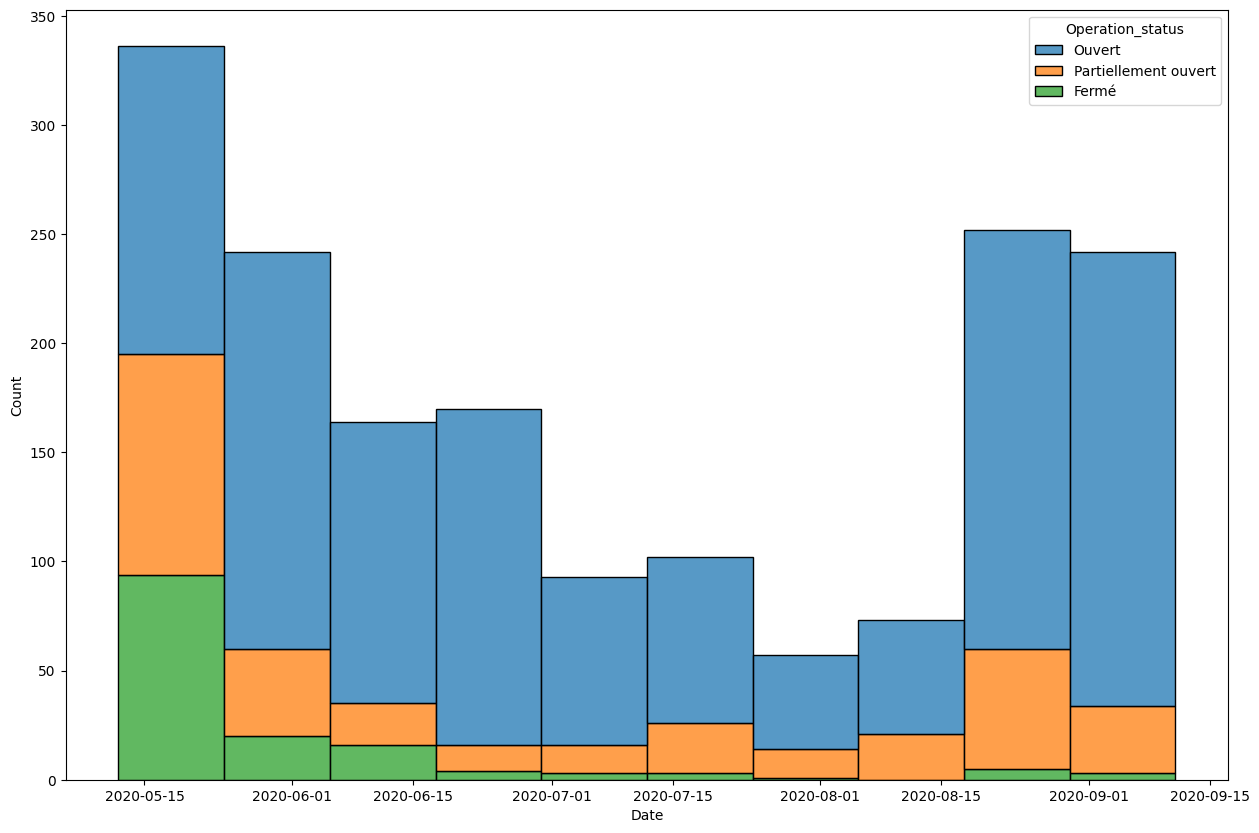

In [16]:
# Status of operations by date
plt.figure(figsize=(15,10))
sns.histplot(data=df_with_loc, x='Date', hue='Operation_status', multiple='stack', bins=10)

In [17]:
operation_status = df_with_loc.groupby(by=['Operation_status']).count().reset_index()

<Axes: xlabel='Operation_status'>

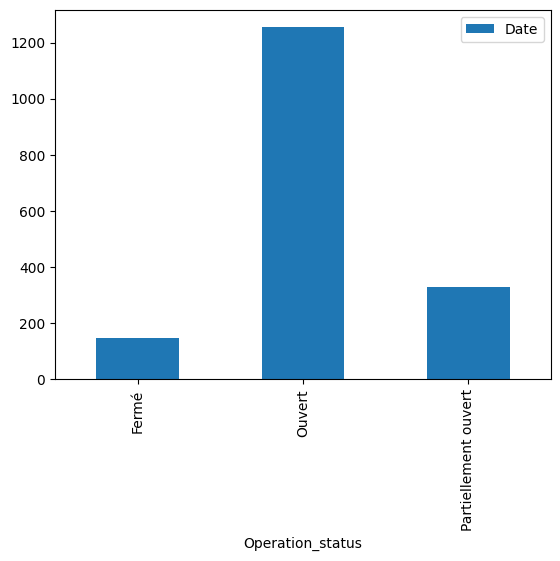

In [18]:
# Operation status
operation_status.plot(x='Operation_status', y='Date', kind='bar')

<Axes: xlabel='Location'>

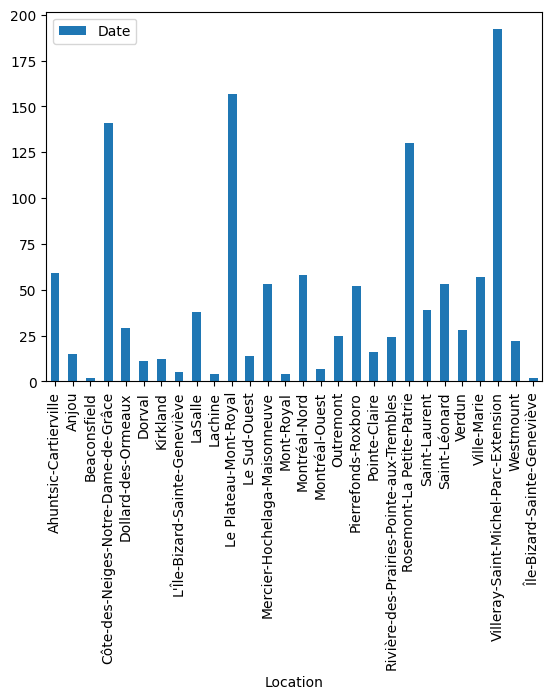

In [19]:
# Counts by location
location_count = df_with_loc.groupby(by=['Location']).count().reset_index()
location_count.plot(x='Location', y='Date', kind='bar')

<Figure size 1500x1500 with 0 Axes>

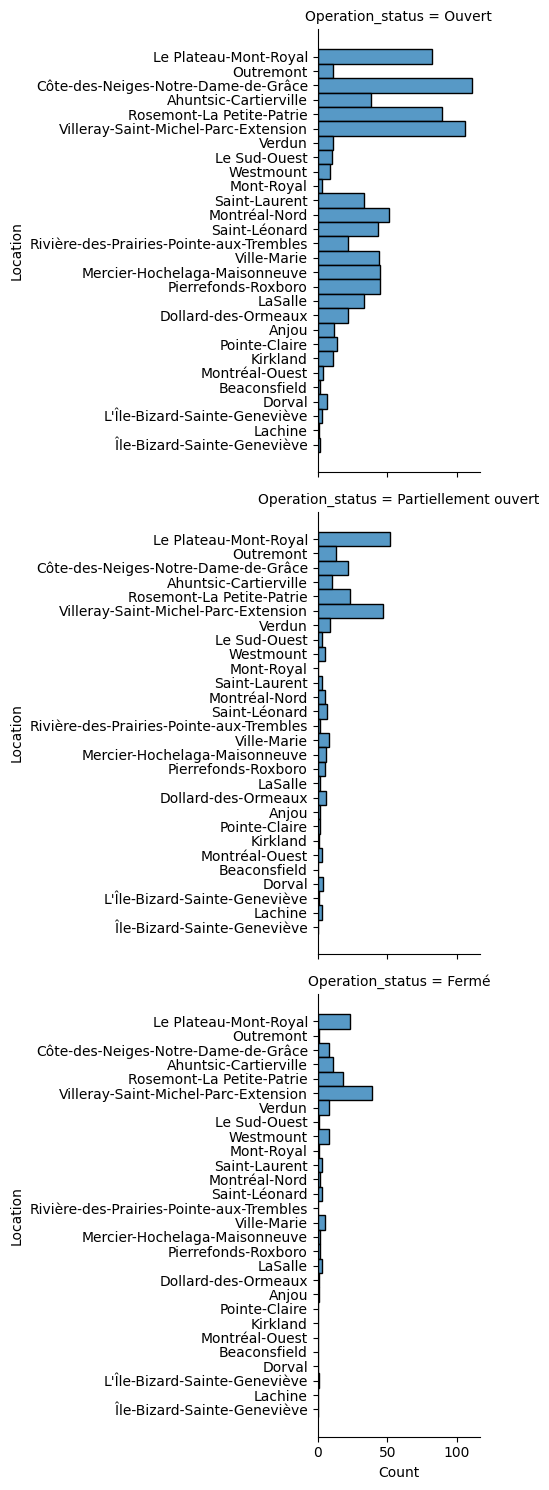

In [20]:
plt.figure(figsize=(15,15))
sns.displot(df_with_loc, y='Location', row='Operation_status')

## Data transformation

### Variables in final model

In [21]:
columns_to_drop = ['Date', 'Phase']

In [22]:
df_with_loc = df_with_loc.drop(columns=columns_to_drop)
df_drop_loc = df_drop_loc.drop(columns=columns_to_drop)

### Encoding

Data transformation for qualitative variables

In [23]:
df_with_loc.columns

Index(['Location', 'Operation_status', 'Challenge_financial_support',
       'Challenge_maintain_ops', 'Challenge_taxes', 'Challenge_HR',
       'Challenge_regulation', 'Challenge_marketing',
       'Challenge_security_health', 'Challenge_sanitary_equip',
       'Challenge_space_management', 'Challenge_terasse_permit',
       'Other_challenges', 'Social_media_pressence', 'Facebook', 'Twitter',
       'Instagram', 'Linkedin', 'Online_businesses', 'Channel_online_business',
       'Delivery_service_offer', 'Satisfaction_current_delivery_service'],
      dtype='object')

In [24]:
df_with_loc.head(2)

,Location,Operation_status,Challenge_financial_support,Challenge_maintain_ops,Challenge_taxes,Challenge_HR,Challenge_regulation,Challenge_marketing,Challenge_security_health,Challenge_sanitary_equip,...,Other_challenges,Social_media_pressence,Facebook,Twitter,Instagram,Linkedin,Online_businesses,Channel_online_business,Delivery_service_offer,Satisfaction_current_delivery_service
0,Le Plateau-Mont-Royal,Ouvert,No,Oui,No,Oui,No,No,No,No,...,Oui,Non,No,No,No,No,Non,Pas de vente en ligne,Question non posée lors de l'appel,Question non posée lors de l'appel
1,Outremont,Partiellement ouvert,Oui,No,No,No,No,No,No,No,...,No,Non,No,No,No,No,Non,Pas de vente en ligne,Question non posée lors de l'appel,Question non posée lors de l'appel


#### Binary encoding

In [25]:
# Selection of variables for different types of encoding
binary_encoding_cols = ['Challenge_financial_support', "Challenge_maintain_ops", "Challenge_taxes",
                    "Challenge_HR", "Challenge_regulation", "Challenge_marketing", "Challenge_security_health", 
                    "Challenge_sanitary_equip", "Challenge_space_management", "Challenge_terasse_permit", "Other_challenges", 
                    "Social_media_pressence", "Facebook", "Twitter", "Instagram", "Linkedin"]

In [26]:
# Encoding
df_with_loc = pd.get_dummies(data=df_with_loc, columns=binary_encoding_cols, drop_first=True)
df_drop_loc = pd.get_dummies(data=df_drop_loc, columns=binary_encoding_cols, drop_first=True)

In [27]:
df_with_loc.head()

,Location,Operation_status,Online_businesses,Channel_online_business,Delivery_service_offer,Satisfaction_current_delivery_service,Challenge_financial_support_Oui,Challenge_maintain_ops_Oui,Challenge_taxes_Oui,Challenge_HR_Oui,...,Challenge_sanitary_equip_Oui,Challenge_space_management_Oui,Challenge_terasse_permit_Oui,Other_challenges_Oui,Social_media_pressence_Oui,Social_media_pressence_Sans réponse,Facebook_Oui,Twitter_Oui,Instagram_Oui,Linkedin_Oui
0,Le Plateau-Mont-Royal,Ouvert,Non,Pas de vente en ligne,Question non posée lors de l'appel,Question non posée lors de l'appel,False,True,False,True,...,False,False,False,True,False,False,False,False,False,False
1,Outremont,Partiellement ouvert,Non,Pas de vente en ligne,Question non posée lors de l'appel,Question non posée lors de l'appel,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Le Plateau-Mont-Royal,Ouvert,Oui,Site transactionnel,Question non posée lors de l'appel,Question non posée lors de l'appel,False,False,False,True,...,True,False,False,True,True,False,True,False,True,False
3,Le Plateau-Mont-Royal,Fermé,Non,Pas de vente en ligne,Question non posée lors de l'appel,Question non posée lors de l'appel,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Le Plateau-Mont-Royal,Ouvert,Non,Pas de vente en ligne,Question non posée lors de l'appel,Question non posée lors de l'appel,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


#### Ordinal encoding

Additional variables required to be encoded - Ordinal encoding: Operation_status, Online_businesses, channel_online_business, delivery_service_offer, satisfaction_current_delivery_service

The ordinal encoding follows the following category: 
- Not applicable, no response, question not posed: 0 
- Closed, No: 1
- Open, Yes: higher. Noted that if the service available before covid, then higher ranking. In addition, higher category for businesses invest in standardized provider (un tiers). 

In [28]:
status_dict = {
              'Fermé':0, 
              'Partiellement ouvert':1, 
              'Ouvert':2}
df_with_loc['Operation_status'] = df_with_loc['Operation_status'].map(status_dict)
df_drop_loc['Operation_status'] = df_drop_loc['Operation_status'].map(status_dict)

In [29]:
online_business_dict = {"Réponse inconnue":0,'Non applicable':0, 
                       'Non':1, 
                       'Oui':2}
df_with_loc['Online_businesses'] = df_with_loc['Online_businesses'].map(online_business_dict)
df_drop_loc['Online_businesses'] = df_drop_loc['Online_businesses'].map(online_business_dict)

In [30]:
online_channel_dict = {'Non applicable':0, 'Réponse inconnue':0, 
                      'Pas de vente en ligne':1, 
                      "Oui, à l'aide d'un système maison, mais seulement depuis la crise":2,
                      'Système maison, disponible avant la crise':3,
                      'Site transactionnel':4, 
                      'Via un tiers (ex. : Amazon, Wayfair, Uber Eats, etc.)':5}

df_with_loc['Channel_online_business'] = df_with_loc['Channel_online_business'].map(online_channel_dict)
df_drop_loc['Channel_online_business'] = df_drop_loc['Channel_online_business'].map(online_channel_dict)

In [31]:
delivery_service_dict = {"Question non posée lors de l'appel":0, 'Non applicable':0,
                        'Sans réponse':0, 
                         'Non':1,
                         'Oui (service maison)':2, 
                        'Oui (via un tiers)':3}
df_with_loc['Delivery_service_offer'] = df_with_loc['Delivery_service_offer'].map(delivery_service_dict)
df_drop_loc['Delivery_service_offer'] = df_drop_loc['Delivery_service_offer'].map(delivery_service_dict)

In [32]:
satisfaction_dict = {"Question non posée lors de l'appel":0, 'Non applicable':0, 
                     'Sans réponse':0, 
                     'Insatisfait':1, 
                     'Moyennement satisfait':2, 
                    'Satisfait':3}
df_with_loc['Satisfaction_current_delivery_service'] = df_with_loc['Satisfaction_current_delivery_service'].map(satisfaction_dict)
df_drop_loc['Satisfaction_current_delivery_service'] = df_drop_loc['Satisfaction_current_delivery_service'].map(satisfaction_dict)

#### High cardinality variable encoding

Additional predictor to be encoded: Location. 
Location variable is a nominal categorical variable with 29 unique levels (locations). Noted that there are 24 other predictors to be used in the model. 

From this, one-hot encoding would not be used due to potential performance issues from increased dimensionality. 
The following considerations were taken regarding the variable: 
- Variable is a categorical and nominal data
- Variable has larger than 15 cardinality
- Consideration of 24 other variables, possible memory issues
- Purpose of the project is interpretability, thus not acceptable for information loss
- Overfitting considerations
- Considerations that not all locations have high data availability, possible categorical outliers.

The following encoding methods will be considered: LeaveOneOut encoding, Target encoding

In addition, data splitting into train and test set is performed. 

In [33]:
# Separate target variable
y = df_with_loc['Operation_status']

In [34]:
# Data splitting
x_train_loc, x_test_loc, y_train_loc, y_test_loc = train_test_split(df_with_loc, y, test_size=0.3)
x_train, x_test, y_train, y_test = train_test_split(df_drop_loc, y, test_size=0.3 )

In [35]:
# Target encoding: train and test set
train_target_encoding = x_train_loc.groupby(['Location'])['Operation_status'].mean().to_dict()
x_train_loc['loc_target_encoded'] =x_train_loc['Location'].map(train_target_encoding)
x_train_loc['loc_target_encoded'] = x_train_loc['loc_target_encoded'].fillna(0)

test_target_encoding = x_test_loc.groupby(['Location'])['Operation_status'].mean().to_dict()
x_test_loc['loc_target_encoded'] = x_test_loc['Location'].map(test_target_encoding)
x_test_loc['loc_target_encoded'] = x_test_loc['loc_target_encoded'].fillna(0)

In [36]:
# Drop target variable from x_train and x_test set
x_train_loc = x_train_loc.drop(['Operation_status'], axis=1)
x_train = x_train.drop(['Operation_status'], axis=1)

x_test_loc = x_test_loc.drop(['Operation_status'], axis=1)
x_test = x_test.drop(['Operation_status'], axis=1)

# Save temporary copy after transformation
x_train_target_copy = x_train_loc[['Location']]
x_test_target_copy = x_test_loc[['Location']]

In [37]:
# Concat location and encoders
match_train_loc = x_train_loc[['Location', 'loc_target_encoded']] 
match_test_loc = x_test_loc[['Location', 'loc_target_encoded']]

# drop Location
x_train_loc = x_train_loc.drop(['Location'], axis=1)
x_test_loc = x_test_loc.drop(['Location'], axis=1)

## Deliverables

### Relationship between qualitative variables

### Classification

The following model will be assessed: 
1. Location not included: x_train, x_test, y_train, y_test
    

2. Location included: x_train_loc, x_test_loc, y_train_loc, y_test_loc 
- Target encoder
- Leave One Out encoder

### Logistic regression

#### Binary classification

In [38]:
# Adjust the ordinal categorical variable in y_train and y_test
binary_status = {0:0 ,1:1, 2:1}
y_train_binary = y_train.map(binary_status)
y_test_binary = y_test.map(binary_status)

# Adjust the ordinal categorical variable in y_train_loc and y_test_loc
y_train_loc_binary = y_train_loc.map(binary_status)
y_test_loc_binary = y_test_loc.map(binary_status)

In [39]:
# Fit model: location not included
log_reg = LogisticRegression().fit(x_train, y_train_binary)

In [40]:
# Result predict: Location not included
y_pred = log_reg.predict(x_test)
y_prob = log_reg.predict_proba(x_test)

Logistic regression train score: 0.9207266721717589
Logistic regression test score: 0.8942307692307693


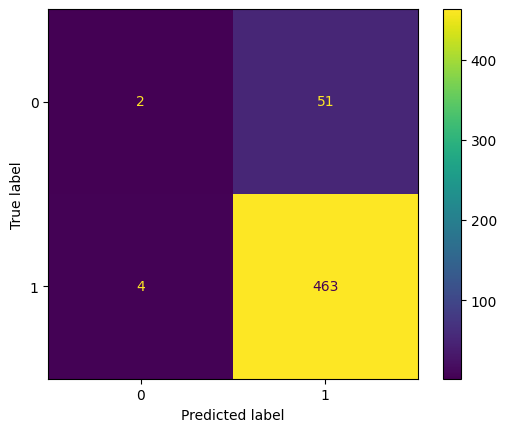

In [41]:
# Result evaluation: Location not included
log_reg_train_score = log_reg.score(x_train, y_train_binary)

log_reg_test_score = log_reg.score(x_test, y_test_binary)

print("Logistic regression train score:", log_reg_train_score)
print("Logistic regression test score:", log_reg_test_score)

# Result evaluation: Location not included
cm = confusion_matrix(y_test_binary, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [42]:
# Result interpretation: Location not included
for x,y in zip(log_reg.coef_[0], x_train.columns):
    print(y,x)
    interpret = math.exp(x)
    perc = round((interpret -1), 2)
    if perc > 0:
        print("There is "+ "{:.0%}".format(abs(perc)) +" increase in the odds of the business remain open")
    elif perc <0:
        print("There is "+ "{:.0%}".format(abs(perc)) +" increase in the odds of closing the business")

Online_businesses -0.4452032028347663
There is 36% increase in the odds of closing the business
Channel_online_business 0.027850979815642555
There is 3% increase in the odds of the business remain open
Delivery_service_offer 0.6628842994671196
There is 94% increase in the odds of the business remain open
Satisfaction_current_delivery_service 0.1514741850653727
There is 16% increase in the odds of the business remain open
Challenge_financial_support_Oui -0.3699695756537073
There is 31% increase in the odds of closing the business
Challenge_maintain_ops_Oui 0.520716303342307
There is 68% increase in the odds of the business remain open
Challenge_taxes_Oui 0.9001668180055835
There is 146% increase in the odds of the business remain open
Challenge_HR_Oui 0.7679168528199625
There is 116% increase in the odds of the business remain open
Challenge_regulation_Oui -1.0949008901159278
There is 67% increase in the odds of closing the business
Challenge_marketing_Oui -0.3740688619487036
There is 3

In [43]:
# Fit model: Location included
log_reg_loc = LogisticRegression().fit(x_train_loc, y_train_loc_binary)

In [44]:
# Result prediction: Location included
y_pred_loc = log_reg_loc.predict(x_test_loc)
y_prob_loc = log_reg_loc.predict_proba(x_test_loc)

Logistic regression train score, with location: 0.9124690338563171
Logistic regression test score, with location: 0.8980769230769231


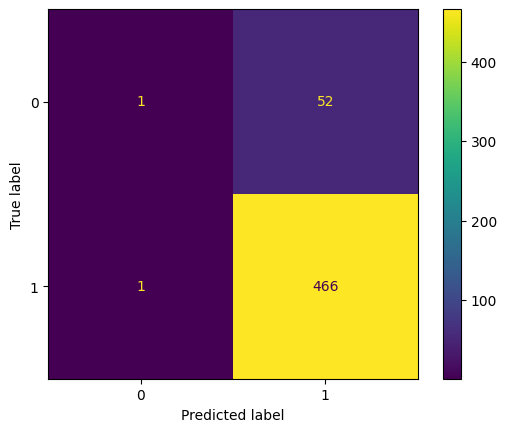

In [45]:
# Result evaluation: Location included
log_reg_loc_train_score = log_reg_loc.score(x_train_loc, y_train_binary)
log_reg_loc_test_score = log_reg_loc.score(x_test_loc, y_test_binary)

print("Logistic regression train score, with location:", log_reg_loc_train_score)
print("Logistic regression test score, with location:", log_reg_loc_test_score)

# Result evaluation: location included
cm_loc = confusion_matrix(y_test_binary, y_pred_loc)
cm_display_loc = ConfusionMatrixDisplay(cm_loc).plot()

In [46]:
# Result interpretation: Location included
for x,y in zip(log_reg_loc.coef_[0], x_train_loc.columns):
    print(y,x)
    interpret = math.exp(x)
    perc = round((interpret -1), 2)
    if perc > 0:
        print("There is "+ "{:.0%}".format(abs(perc)) +" increase in the odds of the business remain open")
    elif perc <0:
        print("There is "+ "{:.0%}".format(abs(perc)) +" increase in the odds of closing the business")
        


Online_businesses -0.10122264803141309
There is 10% increase in the odds of closing the business
Channel_online_business -0.0051022335443686295
There is 1% increase in the odds of closing the business
Delivery_service_offer 1.1154425029900212
There is 205% increase in the odds of the business remain open
Satisfaction_current_delivery_service -0.24574758061523508
There is 22% increase in the odds of closing the business
Challenge_financial_support_Oui -0.5762191724892433
There is 44% increase in the odds of closing the business
Challenge_maintain_ops_Oui 0.40774023398761355
There is 50% increase in the odds of the business remain open
Challenge_taxes_Oui 0.6665200001419915
There is 95% increase in the odds of the business remain open
Challenge_HR_Oui 1.416123001624318
There is 312% increase in the odds of the business remain open
Challenge_regulation_Oui -0.9712229410072556
There is 62% increase in the odds of closing the business
Challenge_marketing_Oui -0.485536955240059
There is 38% 

Interpreting the location coefficent from the target encoding has the following conclusion below: 
- the coefficient is negative, thus an increase in one unit of the location encoding, a decrease in probability that the location is open.
- There is % percentage increase in the odds of closing the business (assuming that all other variables remain fixed) with an increase in unit of target encoding. Please refer to coefficient interpretation above.
- Top5 locations that have high loc_target_encoding are referenced below. 

In [47]:
# Target encoding of the business
match_train_loc.drop_duplicates().sort_values(by=['loc_target_encoded'], ascending=False).reset_index(drop=True).head(5)

,Location,loc_target_encoded
0,Île-Bizard-Sainte-Geneviève,2.000000
1,Beaconsfield,2.000000
2,Mont-Royal,2.000000
3,Kirkland,1.900000
4,Rivière-des-Prairies-Pointe-aux-Trembles,1.888889


#### Multi classes classification

In [48]:
# Fit model: Multi classification location not included
multi_log_reg = LogisticRegression().fit(x_train, y_train)

In [49]:
# Results: Multi classification location not included
multi_y_pred = multi_log_reg.predict(x_test)
multi_y_prob = multi_log_reg.predict_proba(x_test)

Multi-class logistic reg, train: 0.7357555739058629
Multi-class logistic reg, test: 0.7038461538461539


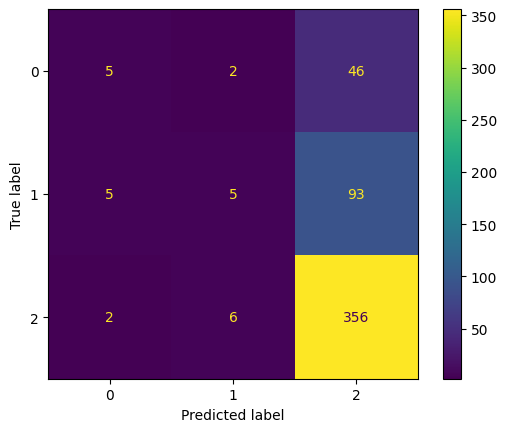

In [50]:
# Result evaluation: Multi classification location not included
multi_log_reg_train_score = multi_log_reg.score(x_train, y_train)
multi_log_reg_test_score = multi_log_reg.score(x_test, y_test)

print("Multi-class logistic reg, train:", multi_log_reg_train_score)
print("Multi-class logistic reg, test:", multi_log_reg_test_score)

# Result evalution: location not included
cm_multi = confusion_matrix(y_test, multi_y_pred)
cm_display_multi = ConfusionMatrixDisplay(cm_multi).plot()

In [51]:
# Result interpretation: Location not included - Business closed option
print("Result Interpretation: Location not included - Business closed option:")
for x,y in zip(multi_log_reg.coef_[0], x_train_loc.columns):
        print(y,x)
        interpret = math.exp(x)
        perc = round((interpret -1), 2)
        if perc < 0:
            print("There is "+ "{:.0%}".format(abs(perc)) +" increase in the odds of the business remain open")
        elif perc > 0:
            print("There is "+ "{:.0%}".format(abs(perc)) +" increase in the odds of closing the business")
        


Result Interpretation: Location not included - Business closed option:
Online_businesses 0.2748384079452408
There is 32% increase in the odds of closing the business
Channel_online_business -0.032255260336783456
There is 3% increase in the odds of the business remain open
Delivery_service_offer -0.485456163077607
There is 38% increase in the odds of the business remain open
Satisfaction_current_delivery_service -0.11214452633260873
There is 11% increase in the odds of the business remain open
Challenge_financial_support_Oui 0.2633926027437693
There is 30% increase in the odds of closing the business
Challenge_maintain_ops_Oui -0.4146447407532172
There is 34% increase in the odds of the business remain open
Challenge_taxes_Oui -0.6707413242981715
There is 49% increase in the odds of the business remain open
Challenge_HR_Oui -0.612266947226183
There is 46% increase in the odds of the business remain open
Challenge_regulation_Oui 0.6795752700470293
There is 97% increase in the odds of clo

In [52]:
# Fit model: multiclassification location included
multi_log_reg_loc = LogisticRegression(max_iter=1000).fit(x_train_loc, y_train_loc)

In [53]:
# Results: Multi classification location included
multi_y_pred_loc = multi_log_reg_loc.predict(x_test_loc)
multi_y_prob_loc = multi_log_reg_loc.predict_proba(x_test_loc)

Multi-class logistic reg, train: 0.731626754748142
Multi-class logistic reg, test: 0.7076923076923077


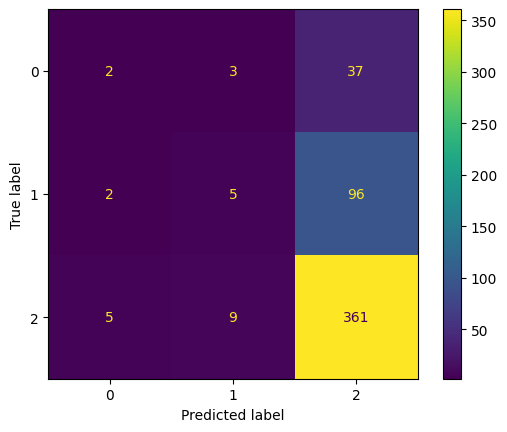

In [54]:
# Results evaluation: Location included
multi_log_reg_loc_train = multi_log_reg_loc.score(x_train_loc, y_train_loc)
multi_log_reg_loc_test = multi_log_reg_loc.score(x_test_loc, y_test_loc)

print("Multi-class logistic reg, train:", multi_log_reg_loc_train)
print("Multi-class logistic reg, test:", multi_log_reg_loc_test)

# Result evaluation: location included
cm_multi_loc = confusion_matrix(y_test_loc, multi_y_pred_loc)
cm_display_multi_loc = ConfusionMatrixDisplay(cm_multi_loc).plot()

In [55]:
# Result interpretation: Location included - Business closed option
print("Result Interpretation: Location included - Business closed option:")
for x,y in zip(multi_log_reg_loc.coef_[0], x_train_loc.columns):
        print(y,x)
        interpret = math.exp(x)
        perc = round((interpret -1), 2)
        if perc < 0:
            print("There is "+ "{:.0%}".format(abs(perc)) +" increase in the odds of the business remain open")
        elif perc > 0:
            print("There is "+ "{:.0%}".format(abs(perc)) +" increase in the odds of closing the business")
        


Result Interpretation: Location included - Business closed option:
Online_businesses 0.019620916878344462
There is 2% increase in the odds of closing the business
Channel_online_business 0.001782736363711297
Delivery_service_offer -0.8525626580233138
There is 57% increase in the odds of the business remain open
Satisfaction_current_delivery_service 0.2073664208007693
There is 23% increase in the odds of closing the business
Challenge_financial_support_Oui 0.3995605187562181
There is 49% increase in the odds of closing the business
Challenge_maintain_ops_Oui -0.3368379289306611
There is 29% increase in the odds of the business remain open
Challenge_taxes_Oui -0.45003694849886794
There is 36% increase in the odds of the business remain open
Challenge_HR_Oui -1.0829502243799554
There is 66% increase in the odds of the business remain open
Challenge_regulation_Oui 0.6045628348189802
There is 83% increase in the odds of closing the business
Challenge_marketing_Oui 0.34550078319312194
There 

Interpreting the location coefficent from the target encoding has the following conclusion below: 
- the coefficient is negative, thus an increase in one unit of the location encoding, a decrease in probability that the location is open.
- There is % percentage increase in the odds of closing the business (assuming that all other variables remain fixed) with an increase in unit of target encoding. Please refer to coefficient interpretation above.
- Top5 locations that have high loc_target_encoding are referenced below. 

In [56]:
match_train_loc.drop_duplicates().sort_values(by=['loc_target_encoded'], ascending=False).reset_index(drop=True).head(5)

,Location,loc_target_encoded
0,Île-Bizard-Sainte-Geneviève,2.000000
1,Beaconsfield,2.000000
2,Mont-Royal,2.000000
3,Kirkland,1.900000
4,Rivière-des-Prairies-Pointe-aux-Trembles,1.888889


### LDA

In [57]:
# Fit model: Location not included
lda = LinearDiscriminantAnalysis().fit(x_train, y_train)

LDA train score: 0.7324525185796862
LDA test score: 0.7057692307692308


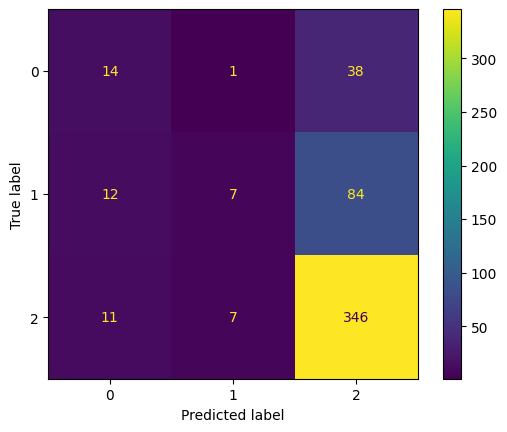

In [58]:
# Prediction
lda_y_pred = lda.predict(x_test)
lda_y_prob = lda.predict_proba(x_test)

# Result evaluation
lda_train_score = lda.score(x_train, y_train)
lda_test_score = lda.score(x_test, y_test)

print("LDA train score:", lda_train_score)
print("LDA test score:", lda_test_score)

# Confusion matrix
cm_lda = confusion_matrix(y_test, lda_y_pred)
cm_lda_display = ConfusionMatrixDisplay(cm_lda).plot()

In [59]:
print("Result Interpretation: Location not included - Business closed option:")
for x,y in zip(lda.coef_[0], x_train_loc.columns):
        print(y,x)
        interpret = math.exp(x)
        perc = round((interpret -1), 2)
        if perc < 0:
            print("There is "+ "{:.0%}".format(abs(perc)) +" increase in the odds of the business remain open")
        elif perc > 0:
            print("There is "+ "{:.0%}".format(abs(perc)) +" increase in the odds of closing the business")

Result Interpretation: Location not included - Business closed option:
Online_businesses 0.2861481282946424
There is 33% increase in the odds of closing the business
Channel_online_business 0.026819818276189712
There is 3% increase in the odds of closing the business
Delivery_service_offer -0.2792426794175882
There is 24% increase in the odds of the business remain open
Satisfaction_current_delivery_service -0.031022548486842428
There is 3% increase in the odds of the business remain open
Challenge_financial_support_Oui 0.33818480033617615
There is 40% increase in the odds of closing the business
Challenge_maintain_ops_Oui -0.6734407061539122
There is 49% increase in the odds of the business remain open
Challenge_taxes_Oui -1.5640859194609522
There is 79% increase in the odds of the business remain open
Challenge_HR_Oui -1.5120873037615494
There is 78% increase in the odds of the business remain open
Challenge_regulation_Oui 2.589954678940116
There is 1233% increase in the odds of clos

In [60]:
# Fit model: Location included
lda_loc = LinearDiscriminantAnalysis().fit(x_train_loc, y_train_loc)

LDA train score, with location: 0.726672171758877
LDA test score, with location: 0.6826923076923077


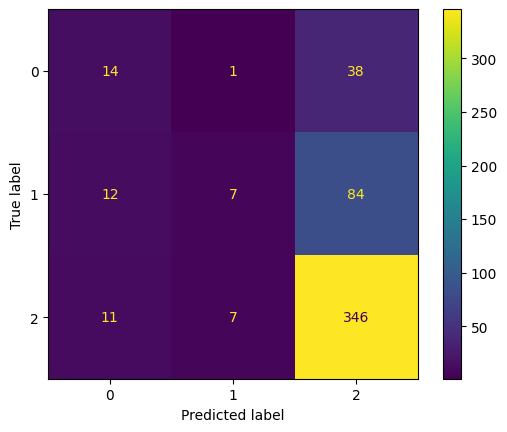

In [61]:
# Prediction
lda_y_pred_loc = lda_loc.predict(x_test_loc)
lda_y_prob_loc = lda_loc.predict_proba(x_test_loc)

# Result
lda_train_score_loc = lda_loc.score(x_train_loc, y_train_loc)
lda_test_score_loc = lda_loc.score(x_test_loc, y_test_loc)

print("LDA train score, with location:", lda_train_score_loc)
print("LDA test score, with location:", lda_test_score_loc)

# Confusion matrix
cm_lda_loc = confusion_matrix(y_test, lda_y_pred_loc)
cm_lda_display_loc = ConfusionMatrixDisplay(cm_lda).plot()

In [62]:
# Result interpretation: Location included - Business closed option
print("Result Interpretation: Location included - Business closed option:")
for x,y in zip(lda_loc.coef_[0], x_train_loc.columns):
        print(y,x)
        interpret = math.exp(x)
        perc = round((interpret -1), 2)
        if perc < 0:
            print("There is "+ "{:.0%}".format(abs(perc)) +" increase in the odds of the business remain open")
        elif perc > 0:
            print("There is "+ "{:.0%}".format(abs(perc)) +" increase in the odds of closing the business")
        


Result Interpretation: Location included - Business closed option:
Online_businesses 0.008645446658932646
There is 1% increase in the odds of closing the business
Channel_online_business 0.041481840354581606
There is 4% increase in the odds of closing the business
Delivery_service_offer -0.3989606917669434
There is 33% increase in the odds of the business remain open
Satisfaction_current_delivery_service 0.11057177326176562
There is 12% increase in the odds of closing the business
Challenge_financial_support_Oui 0.5463137519718749
There is 73% increase in the odds of closing the business
Challenge_maintain_ops_Oui -0.536621593772979
There is 42% increase in the odds of the business remain open
Challenge_taxes_Oui -1.013236570745527
There is 64% increase in the odds of the business remain open
Challenge_HR_Oui -2.501749532937043
There is 92% increase in the odds of the business remain open
Challenge_regulation_Oui 2.215815158900524
There is 817% increase in the odds of closing the busin

### QDA

In [63]:
# Fit model: Location not included
qda = QuadraticDiscriminantAnalysis().fit(x_train, y_train)

/Users/ngocphan/PycharmProjects/montreal_businesses/venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA train score: 0.13212221304706853
QDA test score: 0.1326923076923077


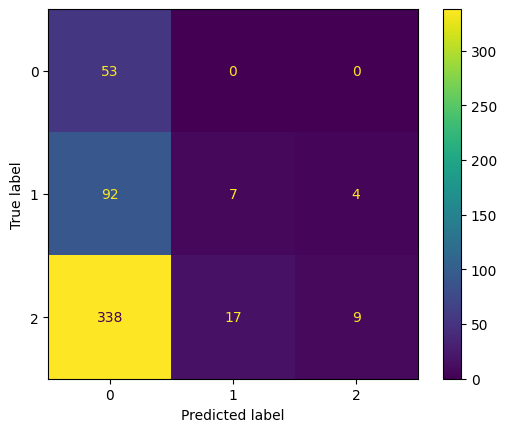

In [64]:
# Prediction
qda_y_pred = qda.predict(x_test)
qda_y_prob = qda.predict_proba(x_test)

# Result
qda_train_score = qda.score(x_train, y_train)
qda_test_score = qda.score(x_test, y_test)

print("QDA train score:", qda_train_score)
print("QDA test score:", qda_test_score)

# Confusion Matrix
cm_qda = confusion_matrix(y_test, qda_y_pred)
cm_qda_display = ConfusionMatrixDisplay(cm_qda).plot()


In [68]:
# Fit model: Location included
qda_loc = QuadraticDiscriminantAnalysis().fit(x_train_loc, y_train_loc)

/Users/ngocphan/PycharmProjects/montreal_businesses/venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA train score: 0.1610239471511148
QDA test score: 0.13653846153846153


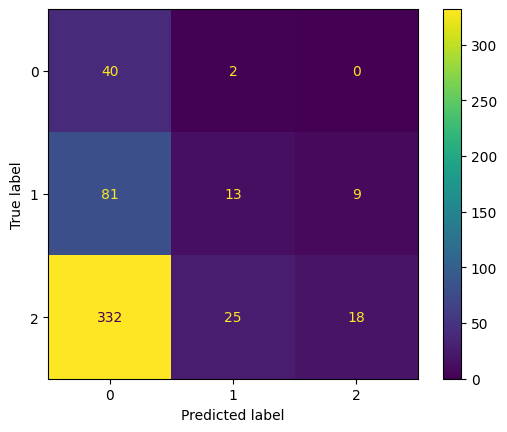

In [70]:
# Prediction
qda_y_pred_loc = qda_loc.predict(x_test_loc)
qda_y_prob_loc = qda_loc.predict_proba(x_test_loc)

# Result
qda_train_score_loc = qda_loc.score(x_train_loc, y_train_loc)
qda_test_score_loc = qda_loc.score(x_test_loc, y_test_loc)

print("QDA train score:", qda_train_score_loc)
print("QDA test score:", qda_test_score_loc)

# Confusion Matrix
cm_qda_loc = confusion_matrix(y_test_loc, qda_y_pred_loc)
cm_qda_display_loc = ConfusionMatrixDisplay(cm_qda_loc).plot()

### KNN